# Projeto de RH Analytics

## Prevendo Perda de Funcionários

## Objetivo:
- Fazer implementação de uma análise de rotatividade de funcionários coma biblioteca Scikit-Learn

## Contexto:
- Rotatividade de funcionários ou turnover é a medida do número total de funcionários que deixaram uma empresa em um determinado ano.
- Previsão de rotatividade de funcionários segnifica prever se um funcionário deixará a organização no próximo período.
- Uma empresa usa essa análise preditiva para medir de quantos funcionários serão necessários se os funcionários em potencial deixarem sua organização.
- Uma empresa também usa essa análise preditivapara tornar o local de trabalho melhor para funcionários, entendendo as pricipais razões para a alta taxa de rotatividade.

In [1]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
# Importando os dados.
rh_data = pd.read_csv("rh_analytics.csv")

In [3]:
# Visualizando como os dados estão dispostos.
rh_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### A coluna "left" é a variável target. 

In [4]:
# Estatísticas básicas
rh_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##### Teve profissionais que pegaram até 7 projetos sendo que a mediana é de 4 o que pode ser uma alta demanda e pode gerar desgaste do funcionário. Levando em consideração 44 horas de trabalho semanal o que totalizaria 176 horas mensais percebemos que a mediana de horas trabalhadas é de 200 horas mensais com profissionais chegando a trabalhar 310 horas no mês.

In [5]:
# Visualizando as dimensões do dataset.
rh_data.shape

(14999, 10)

In [6]:
# Visualizando valores missing
rh_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
# Visualizando linhas duplicadas
rh_data.duplicated().sum()

3008

In [8]:
# Visualizando o tipo de dado contido nas colunas.
rh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### Temos um total de 14.999 entradas de dados, o dataset conta com 10 colunas sendo 8 numéricas e 2 não numéricas, não temos dados ausentes no dataset e contamos com 3008 colunas com valores iguais.

In [9]:
rh_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [10]:
# Explorando a coluna "satisfaction_level"

print(rh_data["satisfaction_level"].describe())

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


In [11]:
print(rh_data["satisfaction_level"].skew())

-0.4763603412839644


<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

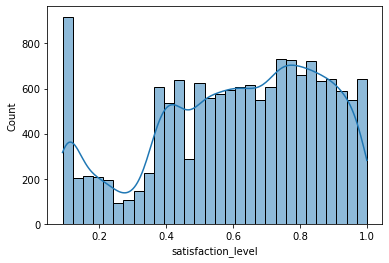

In [12]:
sns.histplot(x = rh_data["satisfaction_level"], kde = True)

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

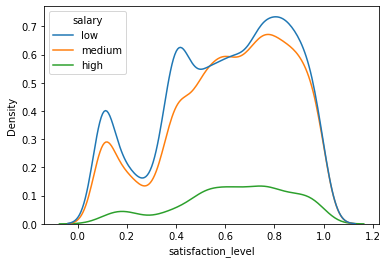

In [13]:
sns.kdeplot(data = rh_data, x = "satisfaction_level", hue= "salary")

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

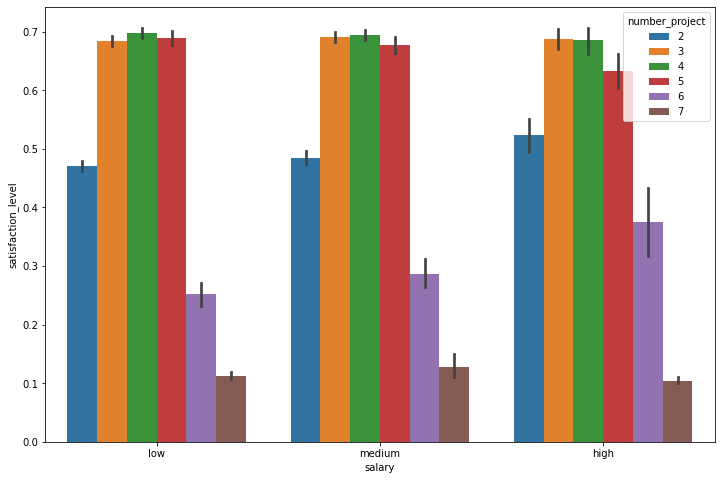

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x = "salary", y = "satisfaction_level", data = rh_data, hue="number_project")

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

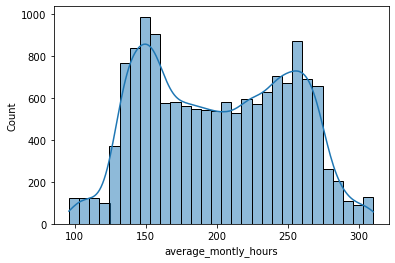

In [15]:
# Explorando a coluna Average Montly Hours
sns.histplot(data = rh_data, x = "average_montly_hours", kde=True)

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64


<AxesSubplot:ylabel='average_montly_hours'>

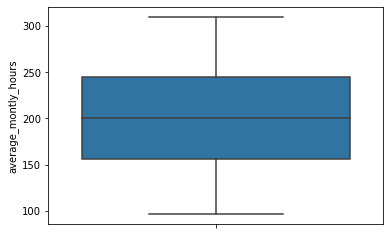

In [16]:
print(rh_data["average_montly_hours"].describe())
sns.boxplot(data = rh_data, y = "average_montly_hours")

In [17]:
# Explorando a coluna "sales"
rh_data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

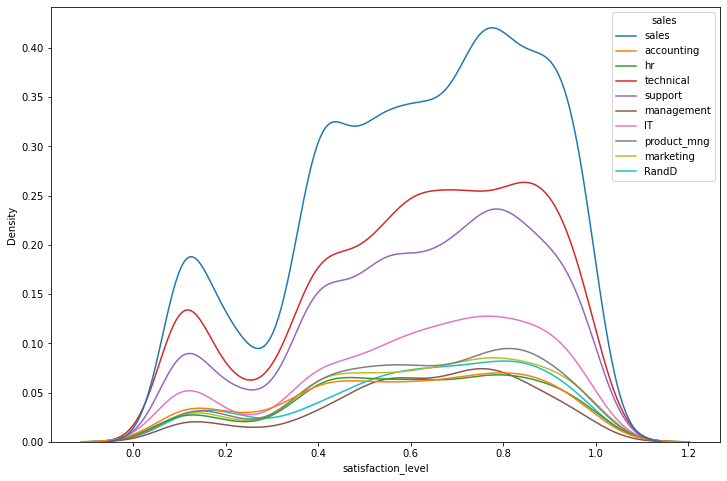

In [18]:
plt.figure(figsize=(12,8))
sns.kdeplot(data = rh_data, x = "satisfaction_level", hue= "sales")

## Conclusão da EDA: 

- Através do comando describe percebemos que o valor da média é menor que o da mediana, o que implica em uma distribuição de dados assimétrica negativa (ou a esquerda), mas por causa do alto valor de distorção é perceptivel que à uma distribuição enviesada dos dados. Como é perceptivel no histograma que é plotado após esse tópico. 
- É observável também através do KDEplot que pessoas com uma faixa salarial considerada média ou baixa tem uma curva um pouco maior a esquerda, representando uma maior quantidade de profissionais insatisfeitos com suas posições.
- No gráfico de barras distribuido pelo referencial salarial profissionais que tem uma alta demanda de projetos tendem a serem menos satisfeitos.
- Observamos que a média de horas trabalhadas é de 201 horas por mês, sendo que alguns profissionais chegam a trabalhar até 310 horas ao mês.
- Explorando a coluna "sales" é visivel que ela se trata dos departamentos ao qual os funcionários pertecem.

# Pré-processamento dos dados

In [19]:
# Alterando o nome da coluna

rh_data = rh_data.rename(columns= {"sales" : "department"})

In [20]:
# Verificando a coluna "department"

rh_data["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
# Transformando as colunas categóricas em numericas

rh_data = pd.get_dummies(rh_data)

In [22]:
rh_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [23]:
# Separando as variáveis explicativas e Target

X = rh_data.drop("left", axis=1)
y = rh_data["left"]

# Construção do Modelo

Vou utilizar um método de seleção de recursos para decidir quais as melhores variáveis para prever a rotatividade de funcionários.

In [24]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True  True False False  True  True  True False  True False  True  True
 False False False False False  True  True False]
[ 1  1  3 11  1  1  1  9  1  6  1  1  7 10  8  5  4  1  1  2]


# Interpretando

Foram escolhidas 10 variáveis que são as marcadas como True no array support_ e marcadas como 1 no array ranking_.

In [25]:
# Essas foram as colunas selecionadas.

cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
        'department_RandD', 'department_accounting', 'department_hr', 'salary_high', 'salary_low']

In [27]:
# Separando as colunas pré-selecionadas para o modelo.

X = rh_data.drop(columns=["left", 'number_project', 'average_montly_hours', 'department_IT', 'department_management',
                           'department_marketing', 'department_product_mng', 'department_sales', 'department_support',
                           'department_technical', "salary_medium"])
y = rh_data["left"]

In [28]:
# Separando os dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Utilizando Regressão Logistica

In [29]:
# Preparando o modelo de Regressão Logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Verificando a acurácia
print("Acurácia da Regressão Logistica: {:.3f}".format(metrics.accuracy_score(y_test, logreg.predict(X_test))))

Acurácia da Regressão Logistica: 0.766


#### Utilizando Random Forest

In [31]:
# Preparando o modelo de RandomForest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
# Verificando a acurácia do RandomForest

print("Acurácia da Floresta Aleátoria: {:.3f}".format(metrics.accuracy_score(y_test, rf.predict(X_test))))

Acurácia da Floresta Aleátoria: 0.980


#### Utilizando XGBoost

In [33]:
xgb = XGBClassifier(n_estimators=5000, learning_rate=0.8, max_depth=7)
xgb.fit(X_train, y_train)

[08:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# Verificando a acurácia do XGB

print("Acurácia da Floresta Aleátoria: {:.3f}".format(metrics.accuracy_score(y_test, xgb.predict(X_test))))

Acurácia da Floresta Aleátoria: 0.976


# Avaliação Final

In [35]:
# Avaliação do Classification report

print(metrics.classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2299
           1       0.95      0.96      0.96       701

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



Text(0.5, 1.0, 'Random Forest')

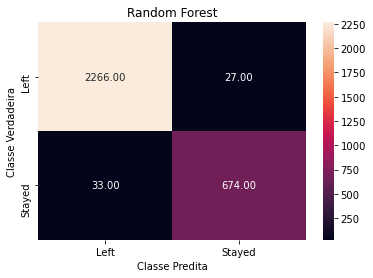

In [36]:
# Avaliação com a Confusion Matrix

y_pred = rf.predict(X_test)

forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot = True, fmt = ".2f", xticklabels = ["Left", "Stayed"], yticklabels = ["Left", "Stayed"])
plt.ylabel("Classe Verdadeira")
plt.xlabel("Classe Predita")
plt.title("Random Forest")

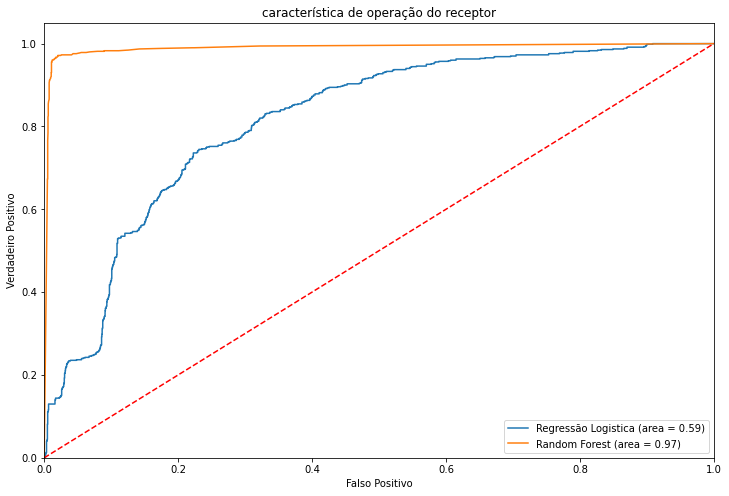

In [37]:
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = "Regressão Logistica (area = %0.2f)" % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label = "Random Forest (area = %0.2f)" % rf_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("característica de operação do receptor")
plt.legend(loc = "lower right")

A curva de característica de operação do receptor (ROC) é uma ferramenta padrão utilizada com classificadores binários. A linha pontilhada vermelha representa a curva ROC de um classificador puramente aleatório; um bom classificador fica o mais longe possível dessa linha (em direção ao canto superior esquerdo).

Portanto, como podemos ver que o modelo de floresta aleatória provou ser mais útil na previsão da rotatividade de funcionários, agora vamos dar uma olhada na importância dos recursos de nosso modelo de classificação de floresta aleatória.

# Importância das Variáveis

Dado nosso modelo de classificação Random Forest, os aspectos acima mostram as características mais importantes que irão influenciar a saída do funcionário da empresa, em ordem crescente.

In [38]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident',
                           'promotion_last_5years','department_RandD', 'department_accounting', 'department_hr', 'salary_high',
                           'salary_low'])

importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{}-{:.2f}%".format(feature_labels[index], (importance[index]*100.0)))

promotion_last_5years-0.25%
department_RandD-0.27%
department_hr-0.27%
department_accounting-0.32%
salary_high-0.76%
salary_low-1.08%
Work_accident-1.46%
last_evaluation-19.13%
time_spend_company-26.41%
satisfaction_level-50.04%


# Conclusão

- Nosso modelo se mostrou com alta performance com uma curva ROC de 0.97 fora outras metricas que se mostraram boas também.
- Conseguimos agora ter noção dos aspectos que mais influenciam e assim ficar de olho neles para combater a rotatividade sendo os 3 principais fatores a Nível de satisfação, o Tempo gasto mensalmente na companhia e a última avaliação dada ao funcionário.